## import dependencies

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog

## load file using the gui popup

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load timestamp csv')

%gui tk

In [3]:
df = pd.read_csv(infiles[0])
df.tail(50)

,Experiment_Start,"(6, 'Stim_Start')","(7, 'Stim_Start')","(8, 'Stim_Start')","(9, 'Stim_Start')","(10, 'Stim_Start')","(11, 'Stim_Start')","(12, 'Stim_Start')","(13, 'Stim_Start')","(14, 'Stim_Start')",...,"(91, 'Stim_Start')","(92, 'Stim_Start')","(93, 'Stim_Start')","(94, 'Stim_Start')","(95, 'Stim_Start')","(96, 'Stim_Start')","(97, 'Stim_Start')","(98, 'Stim_Start')","(99, 'Stim_Start')","(100, 'Stim_Start')"
0,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,1.686844e+09,...,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09,1.686846e+09


## compute time elapsed (detectable behavior start times)

In [4]:
# fmt = '%Y%m%d_%H:%M:%S:%f'
stim_time = []
tstamp_0 = df.iloc[0, 0]
print(tstamp_0)
for i in range(1, np.array(df).shape[1]):
#     print(i)
    try:
        
#         tstamp2 = datetime.strptime(np.array(df)[0, i], fmt)
        tstamp2 = np.array(df)[0, i]
        time_elapsed = tstamp2-tstamp_0
        stim_time.append(time_elapsed)
    except:
        pass
print(stim_time)

1686843636.0932145
[55.70617151260376, 59.817254066467285, 85.19313263893127, 114.91940999031067, 179.07543325424194, 187.7153160572052, 207.4957926273346, 213.1920928955078, 226.4718050956726, 232.56622290611267, 252.1308352947235, 254.61587977409363, 332.58309507369995, 422.2147207260132, 584.6639320850372, 608.5982666015625, 652.8703603744507, 653.2064561843872, 660.1478800773621, 678.0393443107605, 683.9093289375305, 699.6218800544739, 703.2541444301605, 737.9737637042999, 764.2137286663055, 775.6382961273193, 777.1891462802887, 784.5684535503387, 819.3178720474243, 826.9983057975769, 879.4622488021851, 940.2424695491791, 985.6990211009979, 1004.1981229782104, 1019.6066462993622, 1028.358310699463, 1037.1750273704529, 1041.0955328941345, 1043.2647306919098, 1056.0526356697083, 1082.2299828529358, 1084.8360443115234, 1089.7339012622833, 1092.9496047496796, 1102.5347220897675, 1126.8713932037354, 1127.908834695816, 1128.133234500885, 1146.1335279941559, 1168.053038597107, 1174.050137

(0.0, 2419.138204097748)

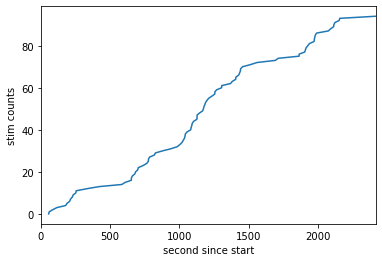

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(stim_time), np.arange(len(stim_time)))
ax.set_ylabel('stim counts')
ax.set_xlabel('second since start')
# ax.vlines(np.where(np.array(stim_time) > 300)[0][0], 0, (np.array(stim_time)).max())
ax.set_xlim([0, (np.array(stim_time)).max()])

### plot, and save

In [6]:
# optional
np.save('D:\Jack\Project\P16/102422/realtime_trial1_orientL.npy', np.array(stim_time))

PermissionError: [Errno 13] Permission denied: 'D:\\Jack\\Project\\P16/102422/realtime_trial1_orientL.npy'

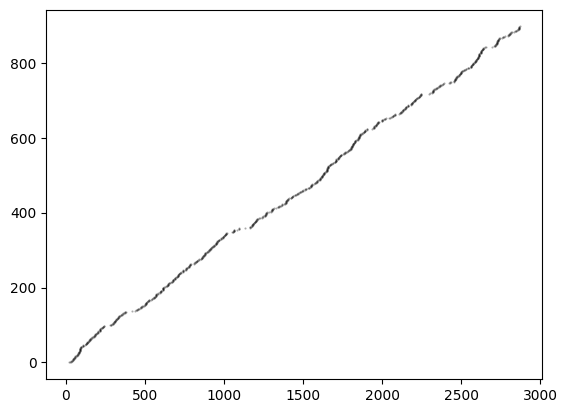

In [19]:
plt.scatter(stim_time, np.arange(len(stim_time)), c='k', s=0.3, alpha=0.3)

In [20]:
# bin by bin_size seconds
bin_size = 900
bin_start = np.arange(0, np.max(stim_time), bin_size)
bin_end = np.arange(bin_size, np.max(stim_time)+bin_size, bin_size)
print(bin_start, bin_end)
stim_binned_counts = []
for b in range(len(bin_start)):
    stim_binned_counts.append(len(np.where((stim_time >= bin_start[b]) & (stim_time < bin_end[b]))[0]))

[   0.  900. 1800. 2700.] [ 900. 1800. 2700. 3600.]


## generating a figure and saving it

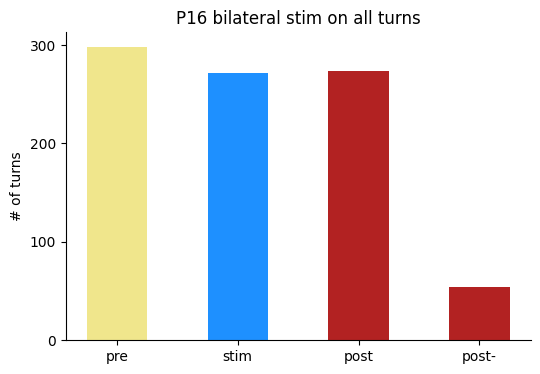

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
exp_paradigm = ['pre', 'stim', 'post', 'post-']
paradigm_colors = ['khaki', 'dodgerblue', 'firebrick', 'firebrick']
# bar(x, y)
ax.bar(np.arange(len(stim_binned_counts)),
       stim_binned_counts, color=paradigm_colors, width=0.5)
ax.set_title('P16 bilateral stim on all turns')
ax.set_ylabel('# of turns')
# ax.xlabel(f'bin number ({bin_size} sec)')
ax.set_xticks(np.arange(0, 4))
ax.set_xticklabels(exp_paradigm)
ax.set_yticks(np.arange(0, 301, 100))
ax.spines[['right', 'top']].set_visible(False)

In [34]:
fig.savefig('../temp_figures/p16_011223_realtime.png', dpi=600)

In [13]:
print(f'animal performs this behavior around {np.mean(stim_binned_counts)/bin_size}Hz')

animal performs this behavior around 0.24944444444444444Hz
